# Guided Project: Storytelling Data Visualization on Exchange Rates
## Introducing the Dataset

In [2]:
import pandas as pd

exchange_rates = pd.read_csv('entrada.csv')
exchange_rates.head()

,Periodo:,Total,Homens,Mulheres
0,2004,11.5,11.7,11.2
1,2005,11.1,11.4,10.9
2,2006,10.5,10.8,10.2
3,2007,10.1,10.4,9.9
4,2008,10.0,10.2,9.8


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
exchange_rates.tail()

,Periodo:,Total,Homens,Mulheres
11,2015,8.0,8.3,7.7
12,2016,7.2,7.4,7.0
13,2017,6.9,7.1,6.8
14,2018,6.8,7.0,6.6
15,2019,6.6,6.9,6.3


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Periodo:  16 non-null     int64  
 1   Total     16 non-null     float64
 2   Homens    16 non-null     float64
 3   Mulheres  16 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 640.0 bytes


## Data Cleaning

In [6]:
exchange_rates.rename(columns={'Homens': 'Homem','Mulheres': 'Mulher'},inplace=True)
exchange_rates['Periodo:'] = pd.to_datetime(exchange_rates['Periodo:'], format="%Y")
exchange_rates.sort_values('Periodo:', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Periodo:,Total,Homem,Mulher
0,2004-01-01,11.5,11.7,11.2
1,2005-01-01,11.1,11.4,10.9
2,2006-01-01,10.5,10.8,10.2
3,2007-01-01,10.1,10.4,9.9
4,2008-01-01,10.0,10.2,9.8


In [7]:
exchange_rates.rename(columns={'Homem': 'Homens','Mulher': 'Mulheres'},inplace=True) #VOLTANDO

In [8]:
ahem = exchange_rates[['Periodo:', 'Total', 'Homens', 'Mulheres']].copy()
ahem['Homens'].value_counts() # 62 '-' characters

8.8     2
11.7    1
11.4    1
10.8    1
10.4    1
10.2    1
9.9     1
9.8     1
9.0     1
8.6     1
8.3     1
7.4     1
7.1     1
7.0     1
6.9     1
Name: Homens, dtype: int64

In [9]:
ahem = ahem[ahem['Homens'] != '-']
ahem['Homens'] = ahem['Homens'].astype(float)
ahem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Periodo:  16 non-null     datetime64[ns]
 1   Total     16 non-null     float64       
 2   Homens    16 non-null     float64       
 3   Mulheres  16 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 640.0 bytes


## Rolling Mean

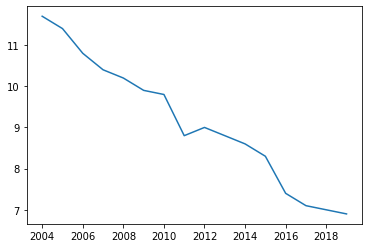

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ahem['Periodo:'], ahem['Homens'])
plt.show()

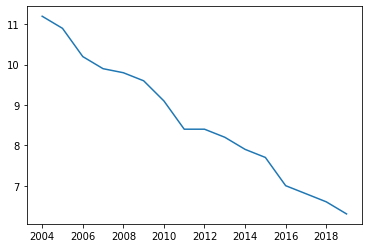

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ahem['Periodo:'], ahem['Mulheres'])
plt.show()

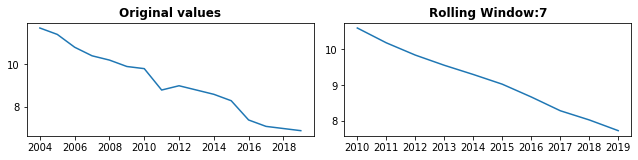

In [12]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(ahem['Periodo:'], ahem['Homens'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7]):
    plt.subplot(3,2,i)
    plt.plot(ahem['Periodo:'],
             ahem['Homens'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [13]:
ahem['rolling_mean'] = ahem['Total'].rolling(1).mean()

ahem

,Periodo:,Total,Homens,Mulheres,rolling_mean
0,2004-01-01,11.5,11.7,11.2,11.5
1,2005-01-01,11.1,11.4,10.9,11.1
2,2006-01-01,10.5,10.8,10.2,10.5
3,2007-01-01,10.1,10.4,9.9,10.1
4,2008-01-01,10.0,10.2,9.8,10.0
5,2009-01-01,9.8,9.9,9.6,9.8
6,2010-01-01,9.6,9.8,9.1,9.6
7,2011-01-01,8.6,8.8,8.4,8.6
8,2012-01-01,8.7,9.0,8.4,8.7
9,2013-01-01,8.5,8.8,8.2,8.5


In [14]:
#ahem1 = ahem.copy()

ahem['Periodo:'] = pd.to_datetime(ahem['Periodo:'], format="%Y")

In [20]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### The Four Brazil Presidencies Example

In [21]:
Lula_Dilma_Temer_Bolsonaro = ahem.copy(
                   )[(ahem['Periodo:'].dt.year >= 2004) & (ahem['Periodo:'].dt.year < 2022)]
Lula = Lula_Dilma_Temer_Bolsonaro.copy(
       )[Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2011]
Dilma = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2010) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2017)]
Temer = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2016) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2019)]
Bolsonaro = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2018) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2022)]

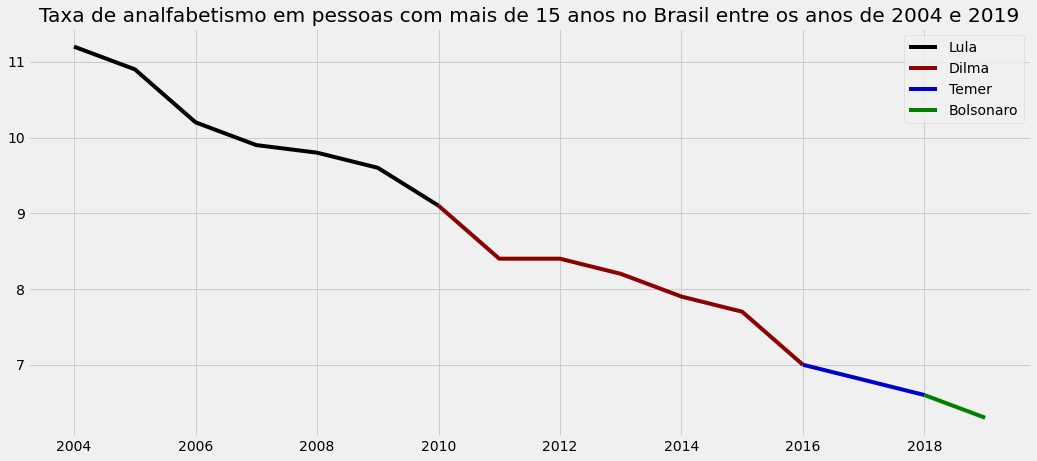

In [22]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

plt.figure(figsize=(16, 7))

plt.plot(Lula['Periodo:'], Lula.rolling_mean,
         label="Lula", color='#000000')
plt.plot(Dilma['Periodo:'], Dilma.rolling_mean,
         label="Dilma", color='#8B0000')
plt.plot(Temer['Periodo:'], Temer.rolling_mean,
         label="Temer", color='#0000CD')
plt.plot(Bolsonaro['Periodo:'], Bolsonaro.rolling_mean,
         label="Bolsonaro", color='#008000')

plt.title('Taxa de analfabetismo em pessoas com mais de 15 anos no Brasil entre os anos de 2004 e 2019')
plt.legend()

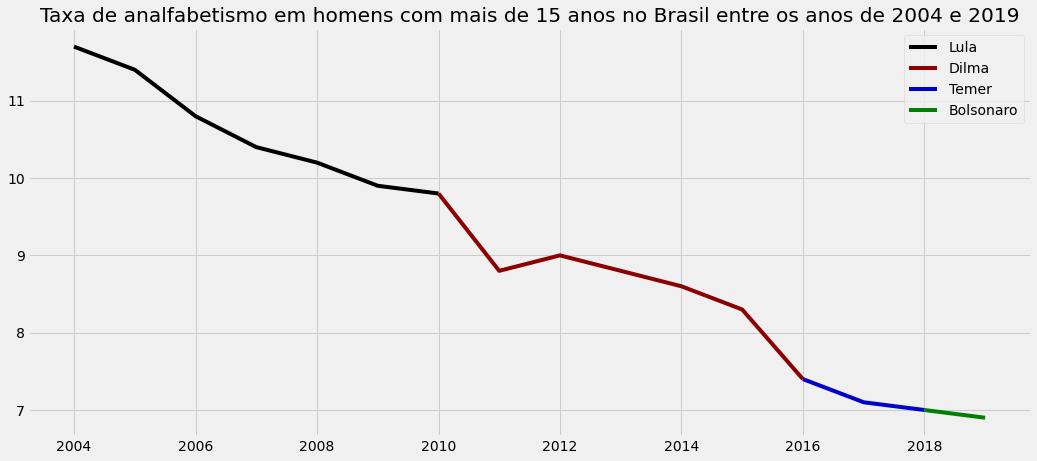

In [23]:
ahem['rolling_mean'] = ahem['Homens'].rolling(1).mean()
ahem

style.use('fivethirtyeight')

Lula_Dilma_Temer_Bolsonaro = ahem.copy(
                   )[(ahem['Periodo:'].dt.year >= 2004) & (ahem['Periodo:'].dt.year < 2022)]
Lula = Lula_Dilma_Temer_Bolsonaro.copy(
       )[Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2011]
Dilma = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2010) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2017)]
Temer = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2016) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2019)]
Bolsonaro = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2018) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2022)]

plt.figure(figsize=(16, 7))

plt.plot(Lula['Periodo:'], Lula.rolling_mean,
         label="Lula", color='#000000')
plt.plot(Dilma['Periodo:'], Dilma.rolling_mean,
         label="Dilma", color='#8B0000')
plt.plot(Temer['Periodo:'], Temer.rolling_mean,
         label="Temer", color='#0000CD')
plt.plot(Bolsonaro['Periodo:'], Bolsonaro.rolling_mean,
         label="Bolsonaro", color='#008000')

plt.title('Taxa de analfabetismo em homens com mais de 15 anos no Brasil entre os anos de 2004 e 2019')
plt.legend()

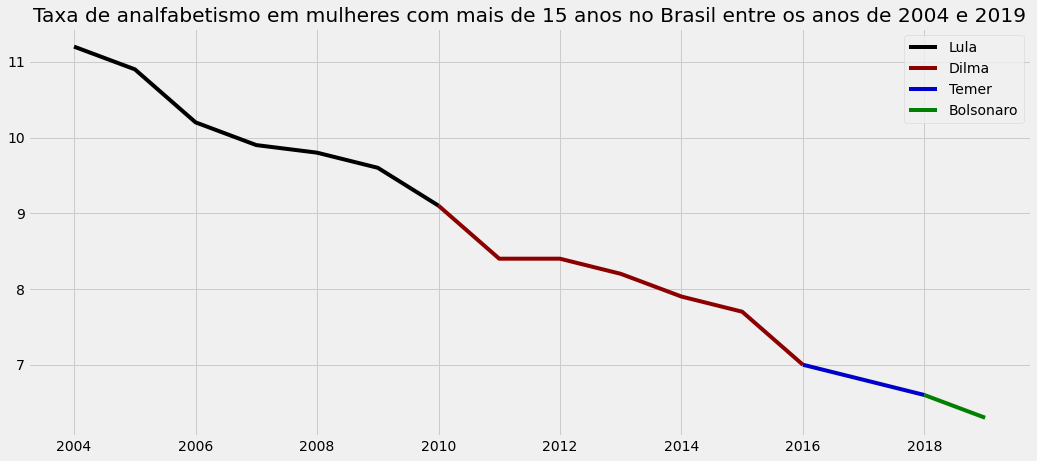

In [24]:
ahem['rolling_mean'] = ahem['Mulheres'].rolling(1).mean()
ahem
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

Lula_Dilma_Temer_Bolsonaro = ahem.copy(
                   )[(ahem['Periodo:'].dt.year >= 2004) & (ahem['Periodo:'].dt.year < 2022)]
Lula = Lula_Dilma_Temer_Bolsonaro.copy(
       )[Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2011]
Dilma = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2010) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2017)]
Temer = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2016) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2019)]
Bolsonaro = Lula_Dilma_Temer_Bolsonaro.copy(
       )[(Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year >= 2018) & (Lula_Dilma_Temer_Bolsonaro['Periodo:'].dt.year < 2022)]

plt.figure(figsize=(16, 7))

plt.plot(Lula['Periodo:'], Lula.rolling_mean,
         label="Lula", color='#000000')
plt.plot(Dilma['Periodo:'], Dilma.rolling_mean,
         label="Dilma", color='#8B0000')
plt.plot(Temer['Periodo:'], Temer.rolling_mean,
         label="Temer", color='#0000CD')
plt.plot(Bolsonaro['Periodo:'], Bolsonaro.rolling_mean,
         label="Bolsonaro", color='#008000')

plt.title('Taxa de analfabetismo em mulheres com mais de 15 anos no Brasil entre os anos de 2004 e 2019')
plt.legend()